## Importing make_moons dataset

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.4)

In [2]:
X

array([[ 0.13916123,  1.25254856],
       [-0.25563377,  1.03382093],
       [ 1.1887927 ,  0.07531053],
       ...,
       [ 0.90150947, -0.555683  ],
       [ 1.28631277, -0.23406152],
       [ 1.29787939,  0.42594965]])

## Spliting the Dataset

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train

array([[-1.30777306, -0.37866859],
       [ 2.22815014, -0.57938491],
       [-1.46246765,  0.04107796],
       ...,
       [ 0.59354639, -0.43221449],
       [-0.75780308,  0.94276197],
       [ 1.84132064,  0.74527344]])

## Applying gridsearch

In [5]:
parameter={
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [None, 2, 4, 6],
    'max_leaf_nodes': [2, 6, 7]
}

In [6]:
grid_search = GridSearchCV(model,param_grid=parameter,cv=5,scoring='accuracy')


In [7]:
import numpy as np
np.isnan(X_train).any()
np.isinf(X_train).any()

np.False_

In [8]:
np.isnan(y_train).any()
np.isinf(y_train).any()

np.False_

## Training and Prediction

In [9]:
grid_search.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 2, ...], 'max_leaf_nodes': [2, 6, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [10]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 7}


In [11]:
y_pred = grid_search.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8733333333333333


In [13]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       158
           1       0.92      0.80      0.86       142

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



In [14]:
best_model = grid_search.best_estimator_

## Visualization

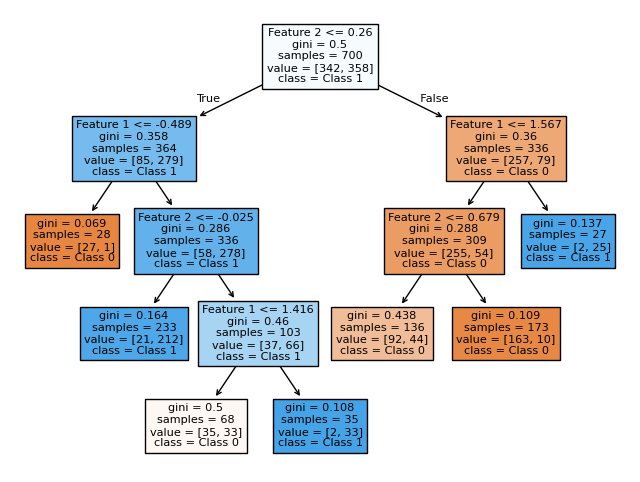

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(8,6))
plot_tree(best_model,feature_names=['Feature 1','Feature 2'],class_names=['Class 0', 'Class 1'],filled=True)
plt.savefig("Decision tree.png",dpi=300,bbox_inches="tight")
plt.show()

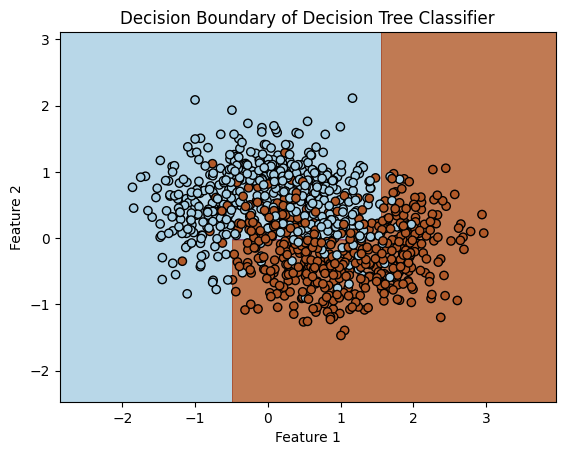

In [17]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Decision Boundary of Decision Tree Classifier")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.savefig("Decsion tree boundary.png",dpi=300,bbox_inches="tight")
    plt.show()


plot_decision_boundary(best_model,X,y)